In [1]:
import pandas as pd

In [2]:
# Cargar el archivo CSV (asegúrate de que esté en la misma carpeta que el notebook)
df = pd.read_csv("Ruta_Empleabilidad_Secretar_a_de_Desarrollo_Econ_mico_Barranquilla_20250515.csv")

# Mostrar las primeras 5 filas
df.head()

,Tipo Documento,Canal de Registro,Edad,Género,Nivel de Estudio,Título Homologado,Ciudad de Residencia,Fecha Registro,Programa de Gobierno,Condiciones Especiales,Situación Laboral,Fecha Actualización,Zona,Mes,Año,Punto Atención,Rango Edad
0,Cédula de Ciudadanía,Autoregistro,23,M,NaN,NaN,BARRANQUILLA,07/01/2022 10:30:40 a.m.,NaN,NaN,NO REGISTRA,07/01/2022 10:30:40 a.m.,NaN,1,"2,022",Barrios San José,18 - 28
1,Cédula de Ciudadanía,Autoregistro,42,M,NaN,NaN,BARRANQUILLA,24/03/2022 06:25:29 p.m.,NaN,NaN,NO REGISTRA,24/03/2022 06:25:29 p.m.,NaN,3,"2,022",Barrios San José,40 - 50
2,Cédula de Ciudadanía,Autoregistro,19,F,NaN,NaN,BARRANQUILLA,24/03/2022 11:06:07 p.m.,NaN,NaN,NO REGISTRA,24/03/2022 11:06:07 p.m.,NaN,3,"2,022",Barrios San José,18 - 28
3,Cédula de Ciudadanía,Autoregistro,21,M,NaN,NaN,BARRANQUILLA,23/03/2022 03:24:09 a.m.,NaN,NaN,NO REGISTRA,23/03/2022 03:24:09 a.m.,NaN,3,"2,022",Barrios San José,18 - 28
4,Cédula de Ciudadanía,Autoregistro,36,M,NaN,NaN,BARRANQUILLA,06/03/2022 02:03:41 p.m.,NaN,NaN,NO REGISTRA,06/03/2022 02:03:41 p.m.,NaN,3,"2,022",Barrios San José,29 - 39


In [3]:
    # Ver número de filas y columnas
print("Forma del dataset:", df.shape)

# Ver tipos de datos y nulos
df.info()

# Ver cantidad de valores nulos por columna
df.isnull().sum()


Forma del dataset: (23353, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23353 entries, 0 to 23352
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Tipo Documento          23353 non-null  object
 1   Canal de Registro       23353 non-null  object
 2   Edad                    23353 non-null  int64 
 3   Género                  23353 non-null  object
 4   Nivel de Estudio        20780 non-null  object
 5   Título Homologado       20765 non-null  object
 6   Ciudad de Residencia    23347 non-null  object
 7   Fecha Registro          23353 non-null  object
 8   Programa de Gobierno    1754 non-null   object
 9   Condiciones Especiales  900 non-null    object
 10  Situación Laboral       23197 non-null  object
 11  Fecha Actualización     23353 non-null  object
 12  Zona                    20868 non-null  object
 13  Mes                     23353 non-null  int64 
 14  Año                    

Tipo Documento                0
Canal de Registro             0
Edad                          0
Género                        0
Nivel de Estudio           2573
Título Homologado          2588
Ciudad de Residencia          6
Fecha Registro                0
Programa de Gobierno      21599
Condiciones Especiales    22453
Situación Laboral           156
Fecha Actualización           0
Zona                       2485
Mes                           0
Año                           0
Punto Atención                0
Rango Edad                    0
dtype: int64

In [4]:
# Eliminar la columna 'Condiciones Especiales'
df.drop(columns=['Condiciones Especiales'], inplace=True)

# Confirmar que fue eliminada
df.columns


Index(['Tipo Documento', 'Canal de Registro', 'Edad', 'Género',
       'Nivel de Estudio', 'Título Homologado', 'Ciudad de Residencia',
       'Fecha Registro', 'Programa de Gobierno', 'Situación Laboral',
       'Fecha Actualización', 'Zona', 'Mes', 'Año', 'Punto Atención',
       'Rango Edad'],
      dtype='object')

In [5]:
# Ver 10 ejemplos únicos de fechas registradas
df['Fecha Registro'].dropna().unique()[:10]

array(['07/01/2022 10:30:40 a.m.', '24/03/2022 06:25:29 p.m.',
       '24/03/2022 11:06:07 p.m.', '23/03/2022 03:24:09 a.m.',
       '06/03/2022 02:03:41 p.m.', '02/03/2022 11:38:33 p.m.',
       '09/03/2022 11:58:18 p.m.', '31/03/2022 07:40:11 a.m.',
       '09/03/2022 12:20:47 p.m.', '01/03/2022 09:02:56 a.m.'],
      dtype=object)

In [6]:
# Crear una copia para no tocar el original
fechas = df['Fecha Registro'].copy()

# Separar las que están en formato ISO y las otras
formato_iso = fechas.str.contains('T', na=False)
formato_normal = ~formato_iso

# Convertir cada grupo por separado
fechas[formato_iso] = pd.to_datetime(fechas[formato_iso])  # ISO
fechas[formato_normal] = pd.to_datetime(
    fechas[formato_normal]
    .str.replace('a.m.', 'AM', regex=False)
    .str.replace('p.m.', 'PM', regex=False),
    format='%d/%m/%Y %I:%M:%S %p'
)

# Asignar la columna convertida de vuelta al DataFrame
df['Fecha Registro'] = fechas

# Verificamos
df['Fecha Registro'].head()


0    2022-01-07 10:30:40
1    2022-03-24 18:25:29
2    2022-03-24 23:06:07
3    2022-03-23 03:24:09
4    2022-03-06 14:03:41
Name: Fecha Registro, dtype: object

In [7]:
# Ver qué registros contienen 'a.m.' o 'p.m.' Y además tienen formato mes/día/año
df['Fecha Actualización'].loc[df['Fecha Actualización'].str.contains(r'\d{2}/\d{2}/\d{4}') & df['Fecha Actualización'].str.contains('a.m.|p.m.', na=False)].head(20)

0     07/01/2022 10:30:40 a.m.
1     24/03/2022 06:25:29 p.m.
2     24/03/2022 11:06:07 p.m.
3     23/03/2022 03:24:09 a.m.
4     06/03/2022 02:03:41 p.m.
5     02/03/2022 11:38:33 p.m.
6     09/03/2022 11:58:18 p.m.
7     31/03/2022 07:40:11 a.m.
8     09/03/2022 12:20:47 p.m.
9     01/03/2022 09:02:56 a.m.
10    11/03/2022 11:03:34 p.m.
12    14/03/2022 07:58:47 p.m.
13    14/03/2022 08:43:33 p.m.
14    14/03/2022 11:10:51 p.m.
15    14/03/2022 08:10:10 p.m.
16    31/03/2022 03:56:30 p.m.
17    11/04/2022 01:06:35 p.m.
18    18/04/2022 10:19:19 a.m.
19    27/04/2022 01:10:09 p.m.
20    26/04/2022 11:19:48 a.m.
Name: Fecha Actualización, dtype: object

In [8]:
df['Fecha Actualización'].loc[
    df['Fecha Actualización'].str.contains(r'\d{2}/\d{2}/\d{4}') &
    ~df['Fecha Actualización'].str.contains('a.m.|p.m.|AM|PM|T|[A-Za-z]', na=False)
].head(20)

9380    03/27/2021 00:53:38
Name: Fecha Actualización, dtype: object

In [9]:
# Convertir TODA la columna sin filtros, permitiendo detección automática
df['Fecha Actualización'] = pd.to_datetime(
    df['Fecha Actualización']
    .str.replace('a.m.', 'AM', regex=False)
    .str.replace('p.m.', 'PM', regex=False)
    .str.replace('  ', ' ', regex=False),  # por si hay dobles espacios
    format='mixed',
    dayfirst=True,
    errors='raise'
)

# Verificamos
df['Fecha Actualización'].head()

0   2022-01-07 10:30:40
1   2022-03-24 18:25:29
2   2022-03-24 23:06:07
3   2022-03-23 03:24:09
4   2022-03-06 14:03:41
Name: Fecha Actualización, dtype: datetime64[ns]

In [10]:
# Eliminar la coma y convertir a entero
df['Año'] = df['Año'].str.replace(',', '', regex=False).astype(int)

# Verificar resultado
df['Año'].unique()

array([2022, 2020, 2021])

In [11]:
sorted(df['Año'].unique())

[2020, 2021, 2022]

In [12]:
df['Año'].head()

0    2022
1    2022
2    2022
3    2022
4    2022
Name: Año, dtype: int32

In [13]:
# Ver tipo y valores únicos
print("Tipo de dato:", df['Mes'].dtype)
print("Valores únicos:", sorted(df['Mes'].unique()))

Tipo de dato: int64
Valores únicos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [14]:
# Filtrar valores fuera de rango 1–12
df[~df['Mes'].between(1, 12)]

,Tipo Documento,Canal de Registro,Edad,Género,Nivel de Estudio,Título Homologado,Ciudad de Residencia,Fecha Registro,Programa de Gobierno,Situación Laboral,Fecha Actualización,Zona,Mes,Año,Punto Atención,Rango Edad


In [15]:
# Contar valores nulos por columna
df.isnull().sum().sort_values(ascending=False)

Programa de Gobierno    21599
Título Homologado        2588
Nivel de Estudio         2573
Zona                     2485
Situación Laboral         156
Ciudad de Residencia        6
Tipo Documento              0
Canal de Registro           0
Edad                        0
Género                      0
Fecha Registro              0
Fecha Actualización         0
Mes                         0
Año                         0
Punto Atención              0
Rango Edad                  0
dtype: int64

In [16]:
# 1. Eliminar columna con demasiados nulos
df.drop(columns=['Programa de Gobierno'], inplace=True)

# 2. Rellenar con "NO REGISTRA"
columnas_no_registra = ['Título Homologado', 'Nivel de Estudio', 'Situación Laboral', 'Ciudad de Residencia']
df[columnas_no_registra] = df[columnas_no_registra].fillna('NO REGISTRA')

# 3. Rellenar "Zona" con "NO APLICA"
df['Zona'] = df['Zona'].fillna('NO APLICA')

# Verificar que ya no hay nulos
df.isnull().sum()


Tipo Documento          0
Canal de Registro       0
Edad                    0
Género                  0
Nivel de Estudio        0
Título Homologado       0
Ciudad de Residencia    0
Fecha Registro          0
Situación Laboral       0
Fecha Actualización     0
Zona                    0
Mes                     0
Año                     0
Punto Atención          0
Rango Edad              0
dtype: int64

In [17]:
df['Fecha Registro'].dtype



dtype('O')

In [18]:
df['Fecha Registro'] = pd.to_datetime(df['Fecha Registro'], dayfirst=True, errors='coerce')


In [19]:
df['Mes-Año'] = df['Fecha Registro'].dt.to_period('M').astype(str)
df[['Fecha Registro', 'Mes-Año']].head()


,Fecha Registro,Mes-Año
0,2022-01-07 10:30:40,2022-01
1,2022-03-24 18:25:29,2022-03
2,2022-03-24 23:06:07,2022-03
3,2022-03-23 03:24:09,2022-03
4,2022-03-06 14:03:41,2022-03


In [20]:
# Definir los rangos de edad
bins = [17, 30, 45, 60, 100]
labels = ['18-30', '31-45', '46-60', '60+']

# Aplicar la clasificación
df['Rango Edad Ampliado'] = pd.cut(df['Edad'], bins=bins, labels=labels)

# Verificamos
df[['Edad', 'Rango Edad Ampliado']].head(10)

,Edad,Rango Edad Ampliado
0,23,18-30
1,42,31-45
2,19,18-30
3,21,18-30
4,36,31-45
5,28,18-30
6,27,18-30
7,24,18-30
8,21,18-30
9,50,46-60


In [21]:
# Calcular diferencia de días entre fechas
df['Antigüedad (días)'] = (df['Fecha Actualización'] - df['Fecha Registro']).dt.days

# Verificamos
df[['Fecha Registro', 'Fecha Actualización', 'Antigüedad (días)']].head(10)


,Fecha Registro,Fecha Actualización,Antigüedad (días)
0,2022-01-07 10:30:40,2022-01-07 10:30:40,0
1,2022-03-24 18:25:29,2022-03-24 18:25:29,0
2,2022-03-24 23:06:07,2022-03-24 23:06:07,0
3,2022-03-23 03:24:09,2022-03-23 03:24:09,0
4,2022-03-06 14:03:41,2022-03-06 14:03:41,0
5,2022-03-02 23:38:33,2022-03-02 23:38:33,0
6,2022-03-09 23:58:18,2022-03-09 23:58:18,0
7,2022-03-31 07:40:11,2022-03-31 07:40:11,0
8,2022-03-09 12:20:47,2022-03-09 12:20:47,0
9,2022-03-01 09:02:56,2022-03-01 09:02:56,0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17608\368610445.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_genero.index, y=conteo_genero.values, palette='pastel')


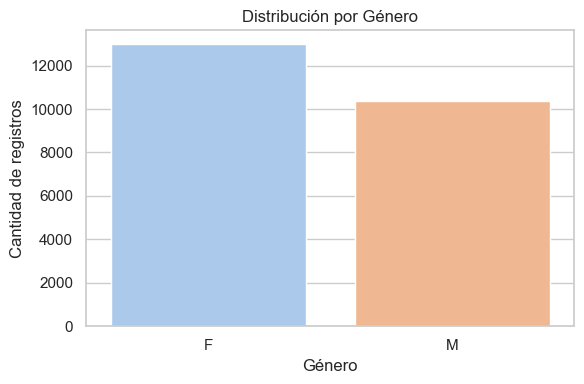

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Conteo por género
conteo_genero = df['Género'].value_counts()

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x=conteo_genero.index, y=conteo_genero.values, palette='pastel')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de registros')
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17608\2347629531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_estudio.index, y=conteo_estudio.values, palette='crest')


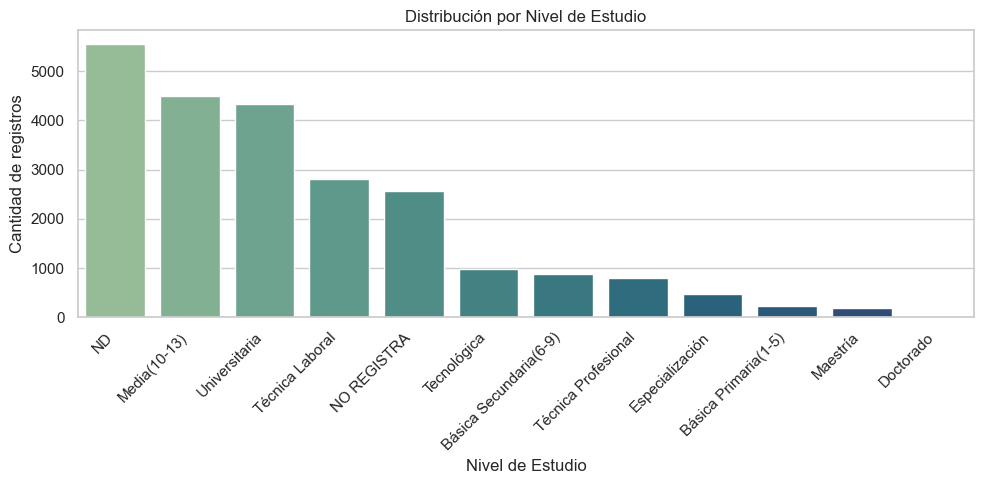

In [23]:
# Conteo de nivel de estudio
conteo_estudio = df['Nivel de Estudio'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_estudio.index, y=conteo_estudio.values, palette='crest')
plt.title('Distribución por Nivel de Estudio')
plt.xlabel('Nivel de Estudio')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17608\161657573.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_laboral.index, y=conteo_laboral.values, palette='flare')


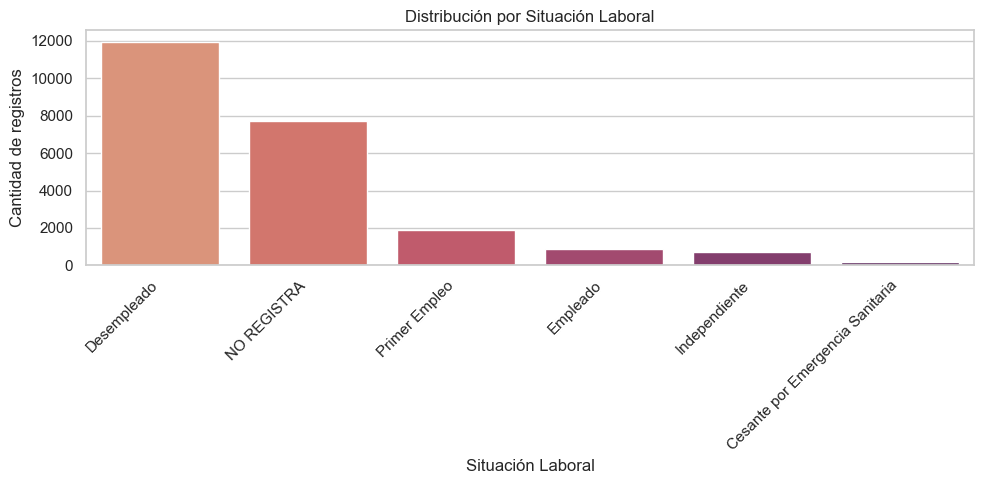

In [24]:
# Conteo de situación laboral
conteo_laboral = df['Situación Laboral'].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_laboral.index, y=conteo_laboral.values, palette='flare')
plt.title('Distribución por Situación Laboral')
plt.xlabel('Situación Laboral')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:
# Crear columna MesAnio_dt a partir de la Fecha Registro
df['MesAnio_dt'] = df['Fecha Registro'].dt.to_period('M').dt.to_timestamp()

In [27]:
# Crear la variable conteo_mes que agrupa por MesAnio_dt y cuenta registros
conteo_mes = df['MesAnio_dt'].value_counts().sort_index()

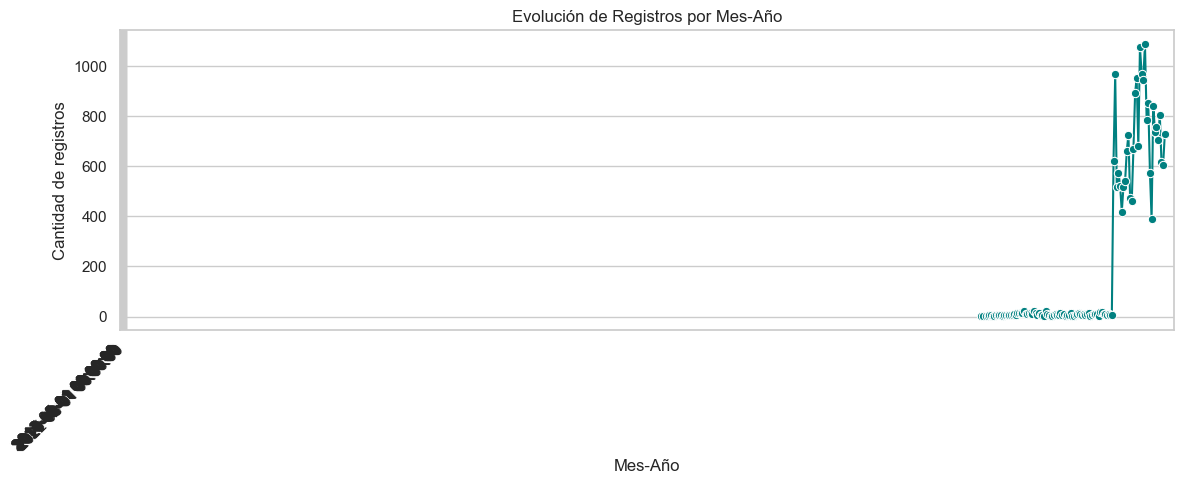

In [28]:
# Gráfico con etiquetas más espaciadas
plt.figure(figsize=(12, 5))
sns.lineplot(x=conteo_mes.index, y=conteo_mes.values, marker='o', color='teal')
plt.title('Evolución de Registros por Mes-Año')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de registros')
plt.xticks(ticks=range(0, len(conteo_mes.index), 6),  # una cada 6
           labels=conteo_mes.index[::6], 
           rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [29]:
# Crear columna tipo datetime solo con año y mes
df['MesAnio_dt'] = df['Fecha Registro'].dt.to_period('M').dt.to_timestamp()


In [30]:
# Crear columna tipo datetime solo con año y mes
df['MesAnio_dt'] = df['Fecha Registro'].dt.to_period('M').dt.to_timestamp()

In [31]:
df_2022 = df[df['MesAnio_dt'].dt.year == 2022]


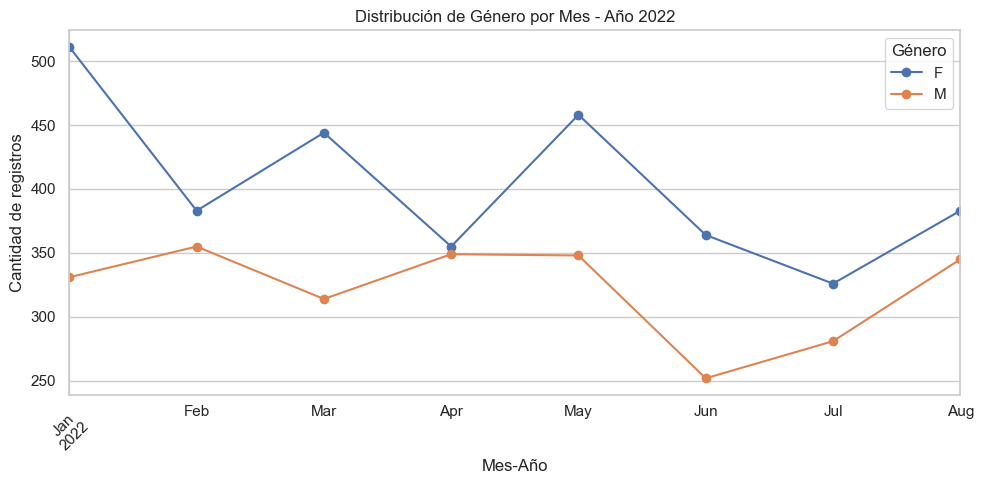

In [32]:
# Agrupar por la nueva columna datetime y por Género
genero_mes = df_2022.groupby(['MesAnio_dt', 'Género']).size().unstack()

# Crear la gráfica
genero_mes.plot(kind='line', marker='o', figsize=(10, 5))

# Personalización
plt.title('Distribución de Género por Mes - Año 2022')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Género')
plt.show()


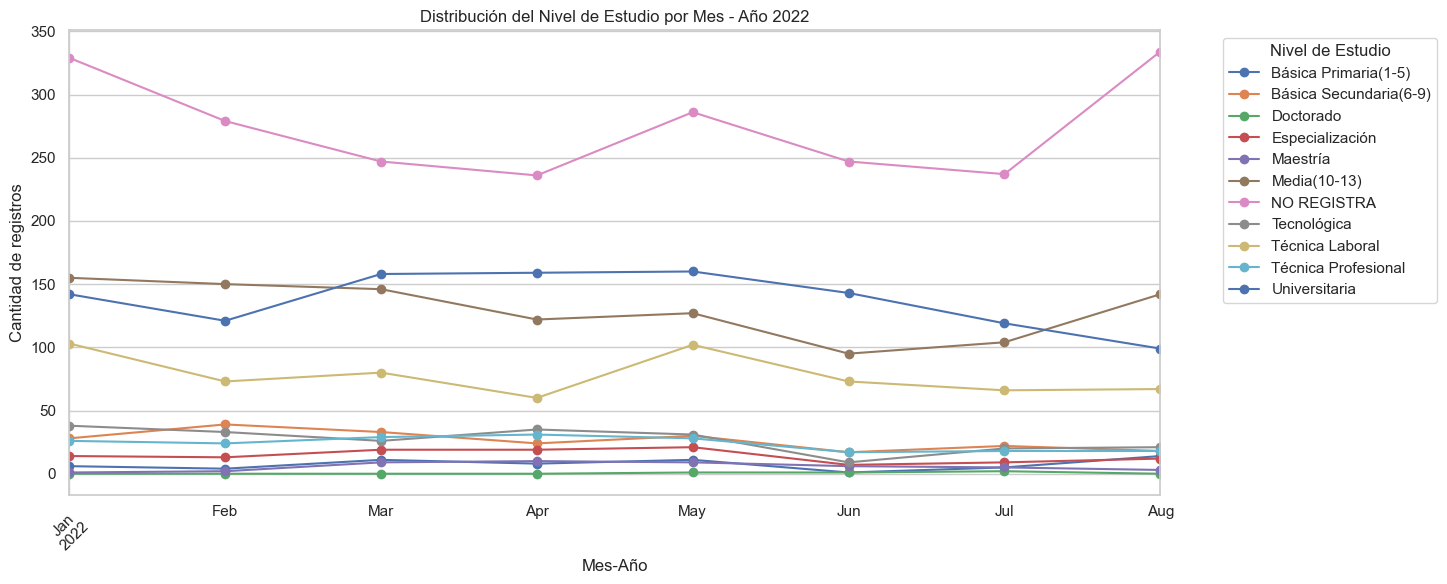

In [33]:
# Filtrar solo registros del año 2022
df_2022 = df[df['MesAnio_dt'].dt.year == 2022]

# Agrupar por MesAnio_dt y Nivel de Estudio
estudio_mes = df_2022.groupby(['MesAnio_dt', 'Nivel de Estudio']).size().unstack().fillna(0)

# Crear gráfica
estudio_mes.plot(kind='line', marker='o', figsize=(12, 6))

# Personalización
plt.title('Distribución del Nivel de Estudio por Mes - Año 2022')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Nivel de Estudio', bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda fuera del gráfico
plt.show()


In [34]:
# Diccionario con las nuevas agrupaciones
mapa_etapas_final = {
    'Básica Primaria(1-5)': 'Primaria',
    'Básica Secundaria(6-9)': 'Secundaria y Media',
    'Media(10-13)': 'Secundaria y Media',
    'Técnica Profesional': 'Educación Técnica / Universitaria',
    'Tecnológica': 'Educación Técnica / Universitaria',
    'Técnica Laboral': 'Educación Técnica / Universitaria',
    'Universitaria': 'Educación Técnica / Universitaria',
    'Especialización': 'Posgrado',
    'Maestría': 'Posgrado',
    'Doctorado': 'Posgrado',
    'NO REGISTRA': 'Sin Información'
}

# Crear la nueva columna con el mapeo
df['Etapa Educativa'] = df['Nivel de Estudio'].map(mapa_etapas_final)


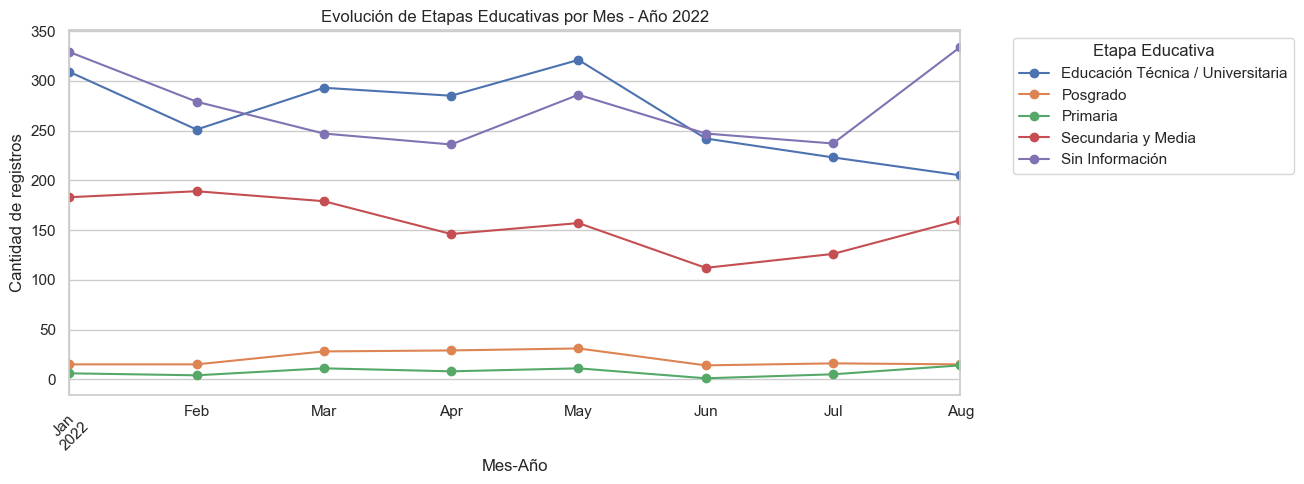

In [35]:
# Filtrar solo datos del año 2022
df_2022 = df[df['MesAnio_dt'].dt.year == 2022]

# Agrupar por mes y etapa educativa
etapas_mes = df_2022.groupby(['MesAnio_dt', 'Etapa Educativa']).size().unstack().fillna(0)

# Graficar
etapas_mes.plot(kind='line', marker='o', figsize=(10, 5))

# Personalización
plt.title('Evolución de Etapas Educativas por Mes - Año 2022')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Etapa Educativa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


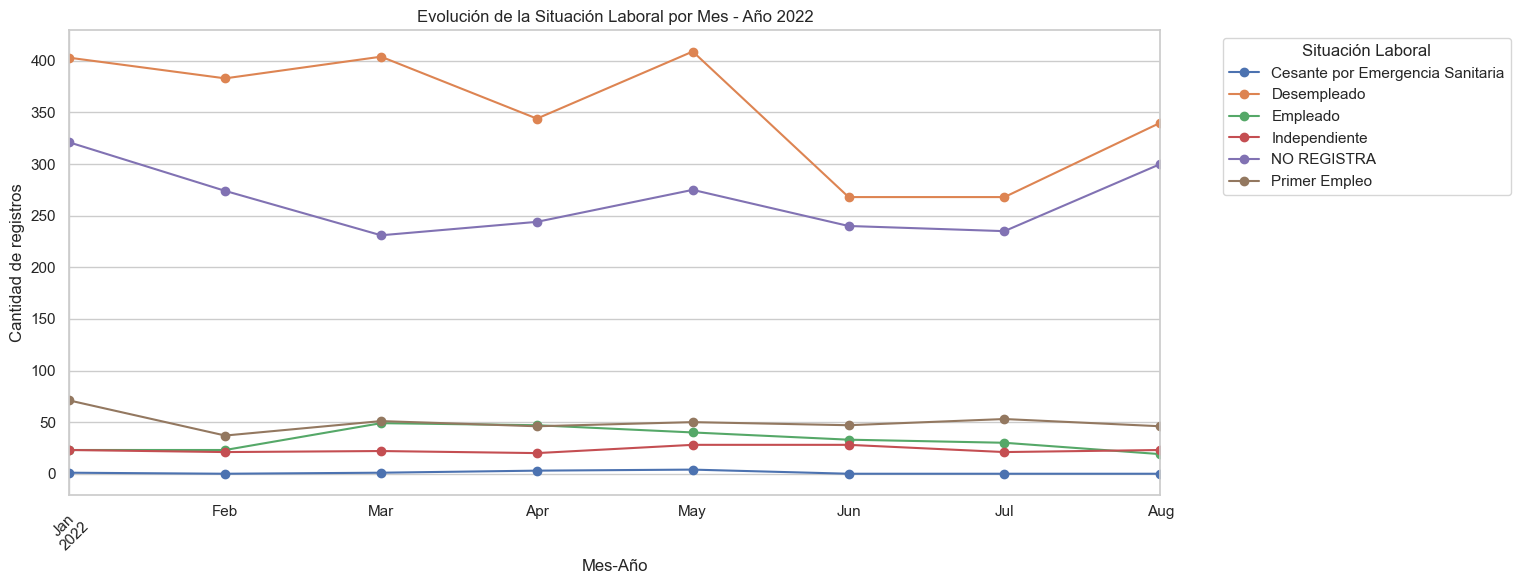

In [36]:
# Filtrar datos del año 2022
df_2022 = df[df['MesAnio_dt'].dt.year == 2022]

# Agrupar por Mes-Año y Situación Laboral
situacion_mes = df_2022.groupby(['MesAnio_dt', 'Situación Laboral']).size().unstack().fillna(0)

# Crear gráfica
situacion_mes.plot(kind='line', marker='o', figsize=(12, 6))

# Personalización
plt.title('Evolución de la Situación Laboral por Mes - Año 2022')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Situación Laboral', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [37]:
# Diccionario de mapeo
mapa_laboral = {
    'Cesante por Emergencia Sanitaria': 'Desempleado',
    'Desempleado': 'Desempleado',
    'Empleado': 'Empleado',
    'Primer Empleo': 'Primer Empleo',
    'Independiente': 'Independiente',
    'NO REGISTRA': 'No registra'
}

# Crear nueva columna agrupada
df['Situación Laboral Agrupada'] = df['Situación Laboral'].map(mapa_laboral)


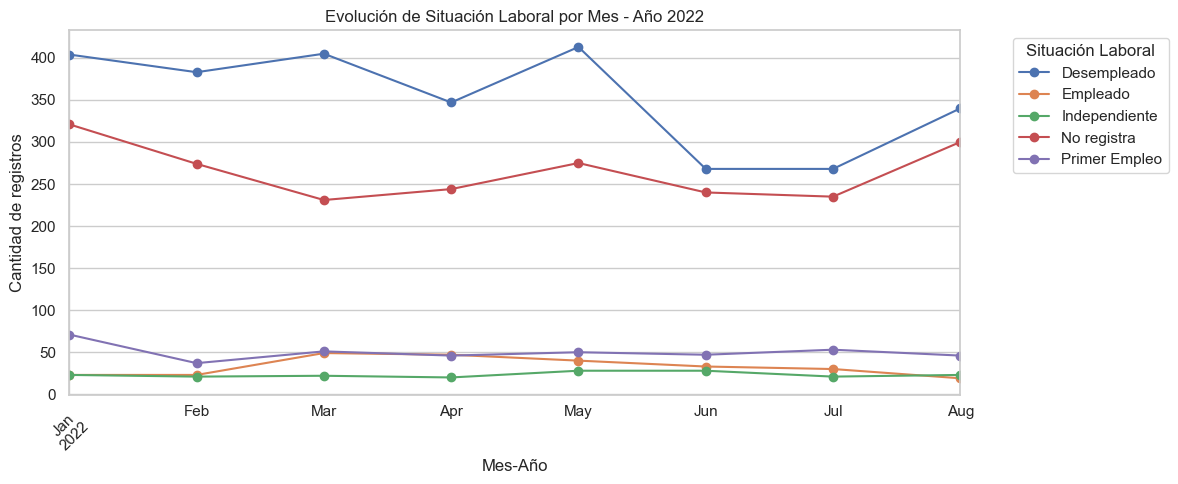

In [38]:
# Filtrar año 2022
df_2022 = df[df['MesAnio_dt'].dt.year == 2022]

# Agrupar por Mes y Situación Laboral Agrupada
lab_mes = df_2022.groupby(['MesAnio_dt', 'Situación Laboral Agrupada']).size().unstack().fillna(0)

# Crear gráfica
lab_mes.plot(kind='line', marker='o', figsize=(10, 5))

# Personalización
plt.title('Evolución de Situación Laboral por Mes - Año 2022')
plt.xlabel('Mes-Año')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Situación Laboral', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [39]:
# Guardar el dataset limpio final
df.to_csv('dataset_limpio.csv', index=False)
print("✅ Dataset limpio guardado como 'dataset_limpio.csv'")

✅ Dataset limpio guardado como 'dataset_limpio.csv'
